# Import Libraries

In [1]:
from analysis_functions import *


#from wavelets.wave_python.waveletFunctions import *
print('Loaded')

2025-03-18 10:57:44.571116: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-18 10:57:44.575839: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-18 10:57:44.590401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-18 10:57:44.614689: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-18 10:57:44.621846: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-18 10:57:46.137217: W tensorflow/compiler/tf2tensorrt/utils/p

Loaded


# Import Signal(s)

In [73]:

data_dir = "../../data/"
suffixes = [f"{i:03d}" for i in range(170)]

sufix = 1
sample = 2  #0 - 9999
fs = 25e6  #sample_frequency
dt = 1/25e6 #period

samples = load_samples(data_dir,f"{sufix:03d}")

# Obtain I[0] and Q[1] signals
i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]

# Calculate the magnitude and phase of the IQ signal
mag = np.sqrt(q_signal**2 + i_signal**2)
phase = np.arctan2(q_signal, i_signal)

iq_signal = np.array(i_signal + 1J*q_signal, dtype=complex)

print('Done')

Done


# A priori knodlage and election of bands

Notes:
To improve: 
- to improve the analisis implement a hamming windoning 

Elección entre Hann y Hamming
Hann: Es preferible cuando se necesita un buen equilibrio entre la reducción del leakage y la resolución espectral. Es común en aplicaciones generales de análisis espectral.

Hamming: Es preferible cuando se necesita una mayor supresión del leakage en frecuencias adyacentes, especialmente en aplicaciones de filtrado y telecomunicaciones.

la funcion esta implementada tiene un error en la muestra de los graficos pero lo que es la parte de procesamiento de la señal esta buena se ubica en test_functions.py


### Agregated FFT signals overal the whole dataset

In [ ]:
# Define the number of signals and files
n_signals = 10000   # 1 to 1000
m_files = 1 # 1 to 170 (In Carlos Toshiba Laptop up to 49/170 )

# Cut-off frequency
freq1 = 500000 # cut-off frequency 1

# Initialize aggregated vectors with a very low value (-10000)
aggregated_vector_q = np.ones(5500)*-10000
aggregated_vector_i = np.ones(5500)*-10000
aggregated_vector_mag = np.ones(5500)*-10000
aggregated_vector_pow = np.ones(5500)*-10000
aggregated_vector_phase = np.ones(5500)*-10000

# Iterate over each file
for sufix in range(m_files):

    # Load the samples from the file
    samples_ = load_samples(data_dir,f"{sufix:03d}")
    
    # Iterate over each signal
    for sample_ in range(n_signals):

        # Get the Q and I signals
        q_signal_ = samples_[sample_,:,1]
        i_signal_ = samples_[sample_,:,0]    
        mag_ = np.sqrt(q_signal_**2 + i_signal_**2) # Calculate the magnitude and phase of the signal
        phase_ = np.arctan2(q_signal_, i_signal_)

        # Unwrap phase to avoid discontinuities
        phase_unwrapped_ = np.unwrap(phase_)
        # Apply Savitzky-Golay filter to smooth phase and calculate the instantaneous frequency
        phase_diff_ = savgol_filter(phase_unwrapped_, window_length=5, polyorder=2, deriv=1, delta=dt)

        # Get the FFT values for the Q signal
        freq_values_q, fft_values_q, power_spectrum_q, magnitude_q  = get_fft_values(q_signal_, fs, pos=True)
        magnitude_q_db = 20 * np.log10(magnitude_q + 1e-10)  # Convert to dB
        #aggregated_vector_q = np.amax(np.vstack([aggregated_vector_q, magnitude_q_db]), axis=0)   #en dB
        aggregated_vector_q = np.amax(np.vstack([aggregated_vector_q, magnitude_q]), axis=0)
        
        # Get the FFT values for the I signal
        freq_values_i, fft_values_i, power_spectrum_i, magnitude_i = get_fft_values(i_signal_, fs, pos=True)
        magnitude_i_db = 20 * np.log10(magnitude_i + 1e-10)  # Convert to dB
        #aggregated_vector_i = np.amax(np.vstack([aggregated_vector_i, magnitude_i_db]), axis=0)   #en dB
        aggregated_vector_i = np.amax(np.vstack([aggregated_vector_i, magnitude_i]), axis=0)

        # Get the FFT values for the magnitude of the signal
        freq_values_mag, fft_values_mag, power_spectrum_mag, magnitude_mag = get_fft_values(mag_, fs, pos=True)
        magnitude_mag_db = 20 * np.log10(magnitude_mag + 1e-10)  # Convert to dB
        #aggregated_vector_mag = np.amax(np.vstack([aggregated_vector_mag, magnitude_mag_db]), axis=0)  #en dB
        aggregated_vector_mag = np.amax(np.vstack([aggregated_vector_mag, magnitude_mag]), axis=0)
        
        power_spectrum_mag_db = 20 * np.log10(power_spectrum_mag + 1e-10)  # Convert to dB
        aggregated_vector_pow = np.amax(np.vstack([aggregated_vector_pow, power_spectrum_mag_db]), axis=0)  #en dB
        #aggregated_vector_pow = np.amax(np.vstack([aggregated_vector_pow, power_spectrum_mag]), axis=0)
        
        # Get the FFT values for the instant frequency
        freq_values_phase, fft_values_phase, power_spectrum_phase, magnitude_phase  = get_fft_values(phase_diff_, fs, pos=True)
        magnitude_phase_db = 20 * np.log10(magnitude_phase + 1e-10)  # Convert to dB
        #aggregated_vector_q = np.amax(np.vstack([aggregated_vector_q, magnitude_q_db]), axis=0)   #en dB
        aggregated_vector_phase = np.amax(np.vstack([aggregated_vector_phase, magnitude_phase]), axis=0)
print('Done')


### FFT of each dataset signal

In [74]:
sufix = 1
sample = 3  #0 - 9999

samples = load_samples(data_dir,f"{sufix:03d}")

# Obtain I[0] and Q[1] signals
i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]

# Calculate the magnitude and phase of the IQ signal
mag = np.sqrt(q_signal**2 + i_signal**2)
phase = np.arctan2(q_signal, i_signal)

# ---------- COMPUTE THE ELECTIONS OF MAGNITUDE - INSTANTANEUS FREQUENCY BANDS ---------- 
N = len(mag)
n_fft = 1

# Unwrap phase to avoid discontinuities
phase_unwrapped = np.unwrap(phase)
# Apply Savitzky-Golay filter to smooth phase and calculate the instantaneous frequency
phase_diff = savgol_filter(phase_unwrapped, window_length=5, polyorder=2, deriv=1, delta=dt)

# Get the FFT values for the magnitude of the signal
freq_values_mag, fft_values_mag, power_spectrum_mag, magnitude_mag = get_fft_values(mag, fs, pos=True, n_fft=n_fft)
aggregated_vector_mag = magnitude_mag

# Get the FFT values for the instantaneus frequency
freq_values_phase, fft_values_phase, power_spectrum_phase, magnitude_phase  = get_fft_values(phase_diff, fs, pos=True, n_fft=n_fft)
aggregated_vector_phase = magnitude_phase
print('Done')

Done


### Calculation of numbers of peaks

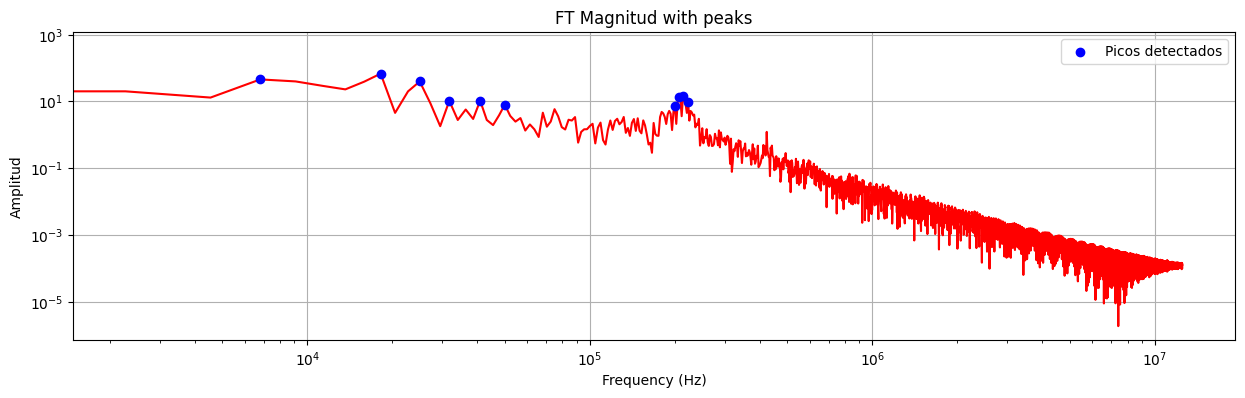

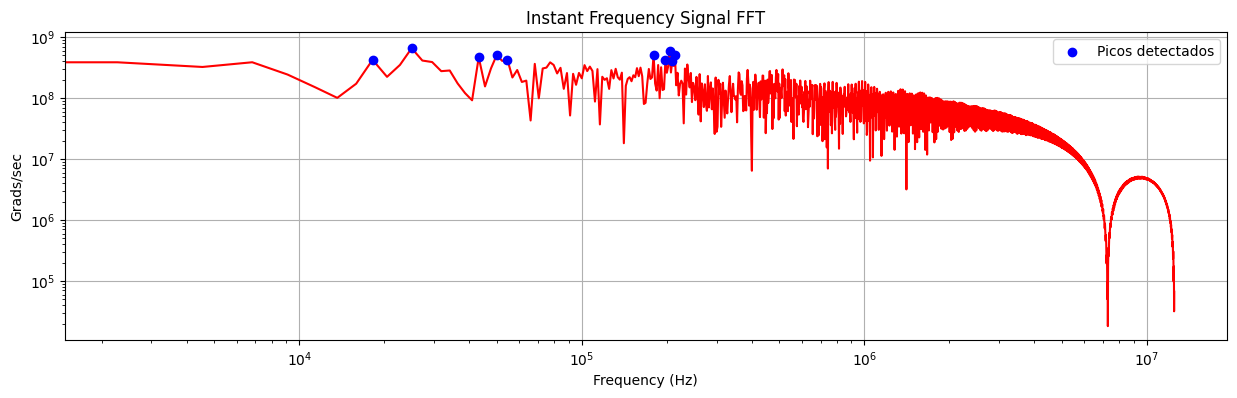

Done


In [75]:
number_peaks = 10


# Find the peaks in the aggregated vectors
#indices_q, values_q, freqs_q = find_peaks_with_frequency(aggregated_vector_q, freq_values_q, N_peaks=number_peaks)
#indices_i, values_i, freqs_i = find_peaks_with_frequency(aggregated_vector_i, freq_values_i, N_peaks=number_peaks)
indices_mag, values_mag, freqs_mag = find_peaks_with_frequency(aggregated_vector_mag, freq_values_mag, N_peaks=number_peaks)
#indices_pow, values_pow, freqs_pow = find_peaks_with_frequency(aggregated_vector_pow, freq_values_mag, N_peaks=number_peaks)
indices_phase, values_phase, freqs_phase = find_peaks_with_frequency(aggregated_vector_phase, freq_values_phase, N_peaks=number_peaks)

# Function to plot the aggregated signal
def plot_agregated_signal(ax, x, y, freq_line=1, name='FFT'):
    ax.plot(x, y, 'r-')
    #ax.axvline(freq_line, color='g', linestyle='--')
    #ax.text(freq_line, 60, f'{freq_line}', rotation=90, horizontalalignment='right', verticalalignment='bottom', color='k')
    ax.semilogx() 
    ax.semilogy() 
    ax.grid(True)
    ax.set_title(name)

# comment or uncomment if you want to see the plot of the results signals Q, I or Mag 
'''    
# Plot the FFT of the Q signal
fig, ax = plt.subplots(figsize=(15,4))
plot_agregated_signal(ax, freq_values_q, aggregated_vector_q, freq_line=500000, name='Q Signal FFT')
plt.scatter(freqs_q, values_q, color='blue', label="Picos detectados", zorder=5)
plt.xlabel('Frecuencia (Hz)')
plt.xscale('log') 
plt.ylabel('Amplitud')
plt.legend()
plt.title('Transformada de Fourier con Picos Detectados')
plt.grid(True)
plt.show()


# Plot the FFT of the I signal
fig, ax = plt.subplots(figsize=(15,4))
plot_agregated_signal(ax, freq_values_i, aggregated_vector_i, freq_line=500000, name='I Signal FFT')
plt.scatter(freqs_i, values_i, color='blue', label="Picos detectados", zorder=5)
plt.xlabel('Frecuencia (Hz)')
plt.xscale('log') 
plt.ylabel('Amplitud')
plt.legend()
plt.title('Transformada de Fourier con Picos Detectados')
plt.grid(True)
plt.show()


# Plot the FFT of the power of the signal
fig, ax = plt.subplots(figsize=(15,4))
plot_agregated_signal(ax, freq_values_mag, aggregated_vector_pow, freq_line=1000000, name='FT Power with peaks')
plt.scatter(freqs_pow, values_pow, color='blue', label="Picos detectados", zorder=5)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()
'''

# Plot the FFT of the magnitude of the signal
fig, ax = plt.subplots(figsize=(15,4))
plot_agregated_signal(ax, freq_values_mag, aggregated_vector_mag, freq_line=1000000, name='FT Magnitud with peaks')
plt.scatter(freqs_mag, values_mag, color='blue', label="Picos detectados", zorder=5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()



# Plot the FFT of the instant frequency signal
fig, ax = plt.subplots(figsize=(15,4))
plot_agregated_signal(ax, freq_values_phase, aggregated_vector_phase, freq_line=1000000, name='Instant Frequency Signal FFT')
plt.scatter(freqs_phase, values_phase, color='blue', label="Picos detectados", zorder=5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Grads/sec')
plt.legend()
plt.show()


print('Done')


Calculation of the bandwidths for each peak

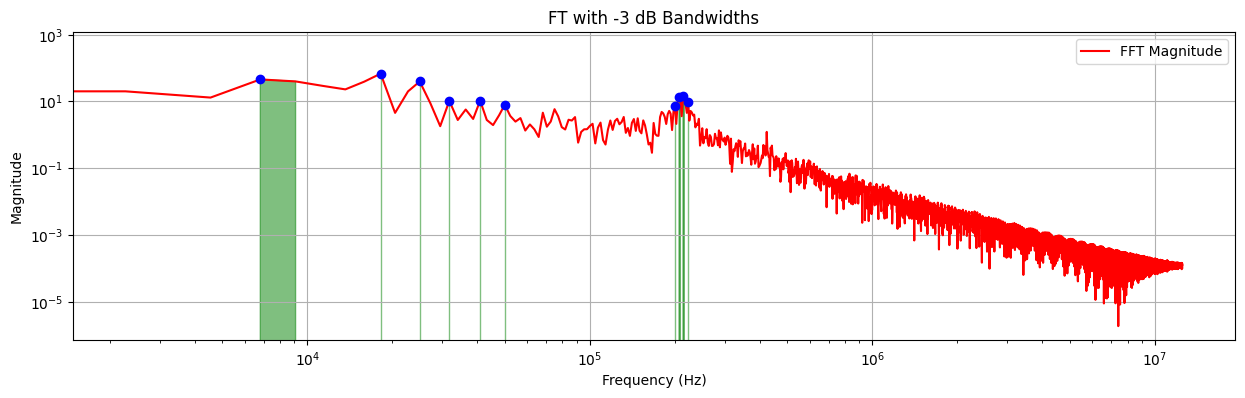

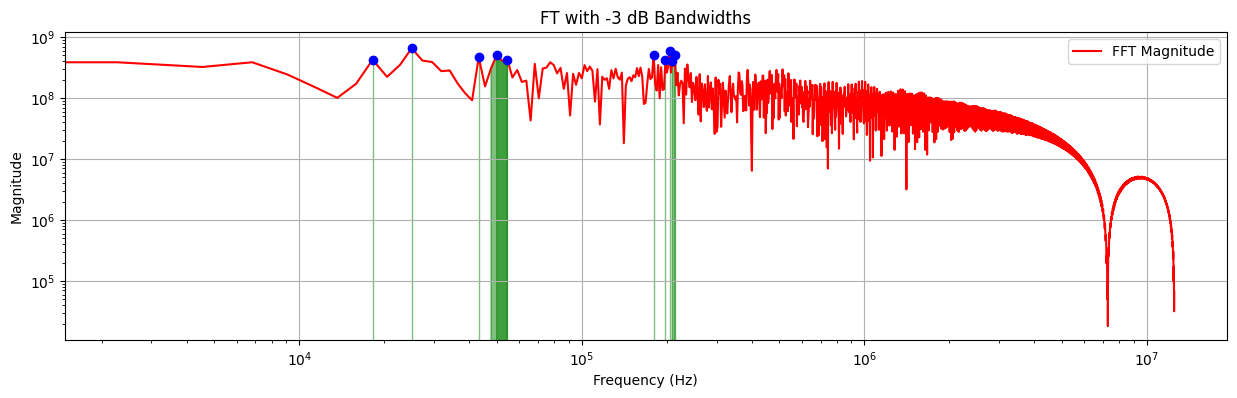

bandwidths_mag


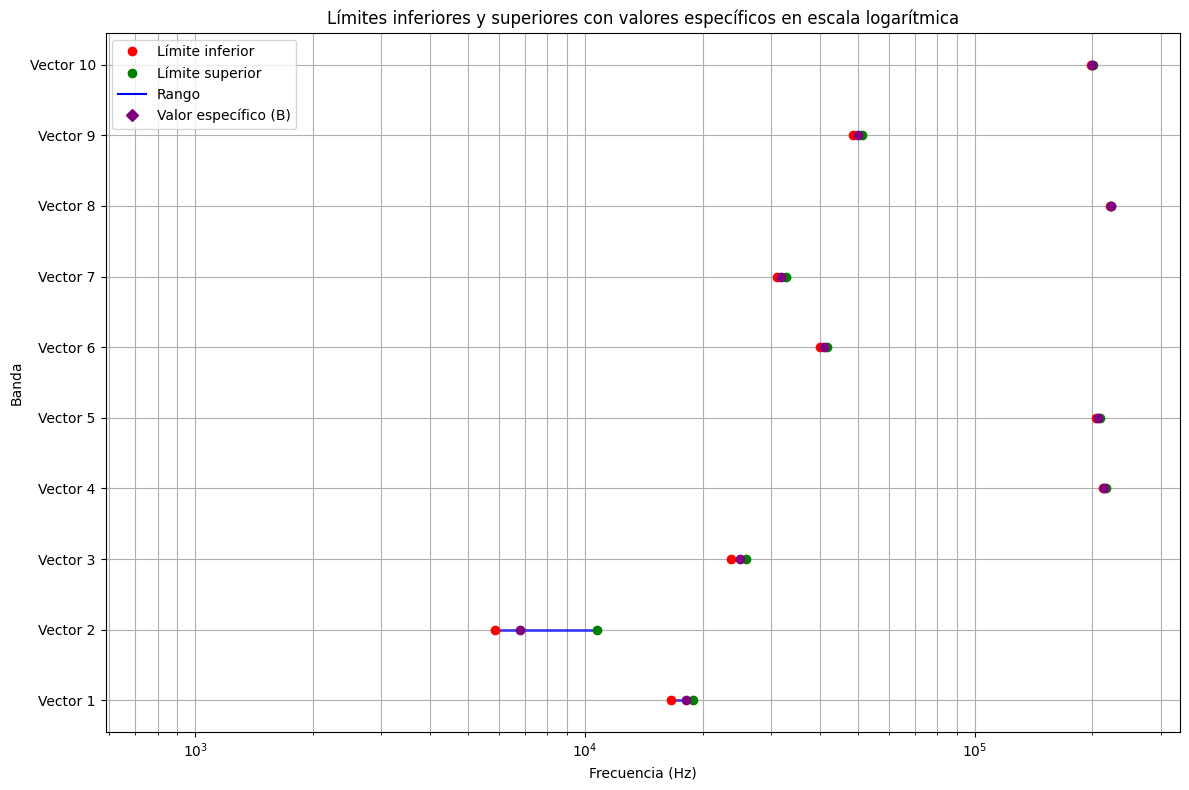

bandwidths_phase


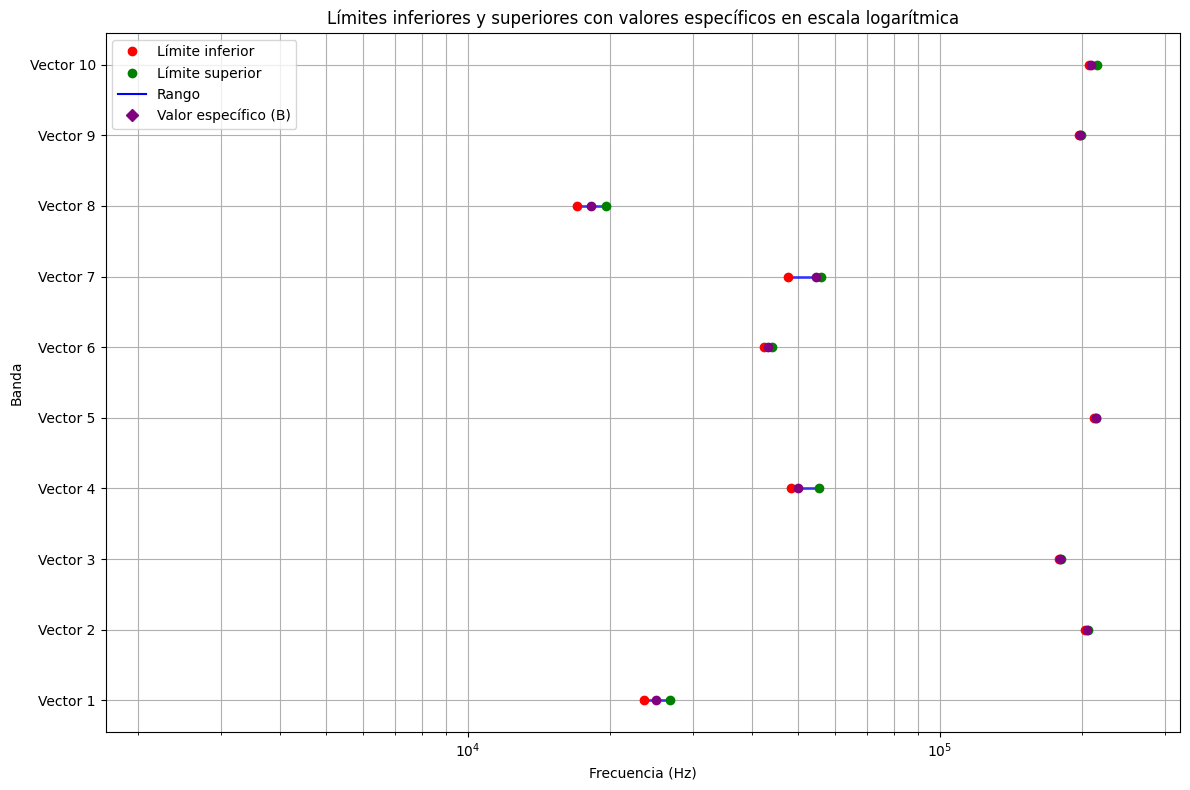

bandwidths_mag
+---------+-------------+------------+---------+-----------+
| Band    |   Low Limit |   Up Limit |      BW |   F. Peak |
+=========+=============+============+=========+===========+
| Band 1  |    16611.50 |   18895.59 | 2284.09 |  18181.82 |
+---------+-------------+------------+---------+-----------+
| Band 2  |     5885.24 |   10697.31 | 4812.06 |   6818.18 |
+---------+-------------+------------+---------+-----------+
| Band 3  |    23651.89 |   25856.62 | 2204.73 |  25000.00 |
+---------+-------------+------------+---------+-----------+
| Band 4  |   212745.32 |  216514.50 | 3769.19 | 213636.36 |
+---------+-------------+------------+---------+-----------+
| Band 5  |   204727.36 |  209676.43 | 4949.07 | 206818.18 |
+---------+-------------+------------+---------+-----------+
| Band 6  |    39979.22 |   41813.94 | 1834.72 |  40909.09 |
+---------+-------------+------------+---------+-----------+
| Band 7  |    31011.21 |   32727.87 | 1716.65 |  31818.18 |
+--------

In [77]:
umbral = 0.707

# Bandwidth for magnitude 
bandwidths_mag = compute_bandwidth_t(freq_values_mag, aggregated_vector_mag, freqs_mag, umbral)
plot_fft_with_bandwidths(freq_values_mag, aggregated_vector_mag, bandwidths_mag, freqs_mag, values_mag)


# Bandwidth for instant frequency 
bandwidths_phase = compute_bandwidth_t(freq_values_phase, aggregated_vector_phase, freqs_phase, umbral)
plot_fft_with_bandwidths(freq_values_phase, aggregated_vector_phase, bandwidths_phase, freqs_phase, values_phase)

print("bandwidths_mag")    
# Llamar a la función
fig, ax = plot_ranges_and_points_log_scale(bandwidths_mag, freqs_mag)

# Mostrar el gráfico
plt.show()


print("bandwidths_phase")  
# Llamar a la función
fig, ax = plot_ranges_and_points_log_scale(bandwidths_phase, freqs_phase)

# Mostrar el gráfico
plt.show()

print("bandwidths_mag")
tabla_bandas_transpuesta(bandwidths_mag, freqs_mag)

print("bandwidths_phase")
tabla_bandas_transpuesta(bandwidths_phase, freqs_phase)


# Calculation of PSD

## Select signal y el Problema con el Cálculo de la Fase
La fase de una señal IQ se calcula mediante la siguiente expresión:

\[
\theta[n] = \tan^{-1}\left(\frac{Q[n]}{I[n]}\right)
\]

Donde:
- \(I[n]\): Componente en fase (In-phase)
- \(Q[n]\): Componente en cuadratura (Quadrature)

Sin embargo, al usar la función `atan2(Q, I)` en lenguajes como Python, los valores de la fase se devuelven en el rango:

\[
[-\pi, \pi]
\]

### Problema Identificado
Esto genera **saltos bruscos** en la fase cuando el valor cruza los límites del rango, por ejemplo:
- De \(\pi\) a \(-\pi\)
- De \(-\pi\) a \(\pi\)

Estos saltos no reflejan el comportamiento continuo real de la fase, lo que puede introducir errores en el análisis de señales.

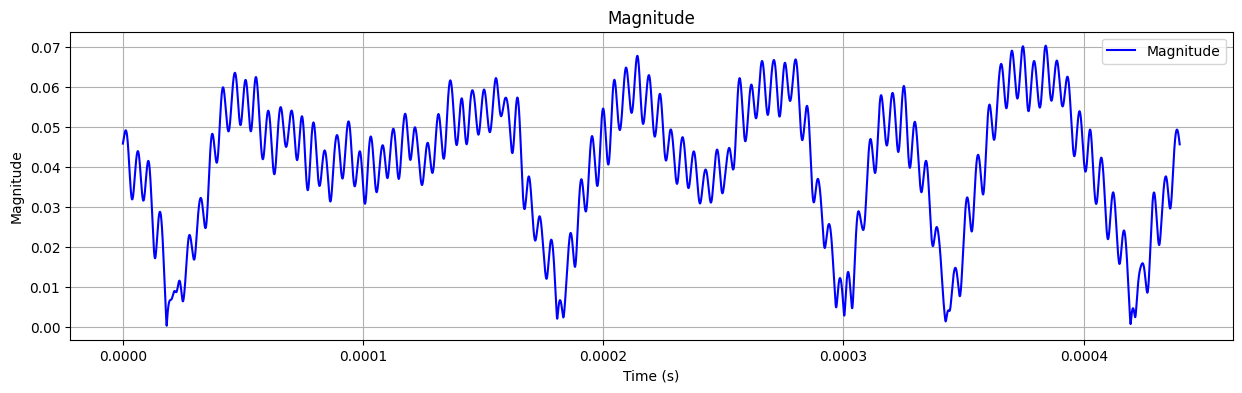

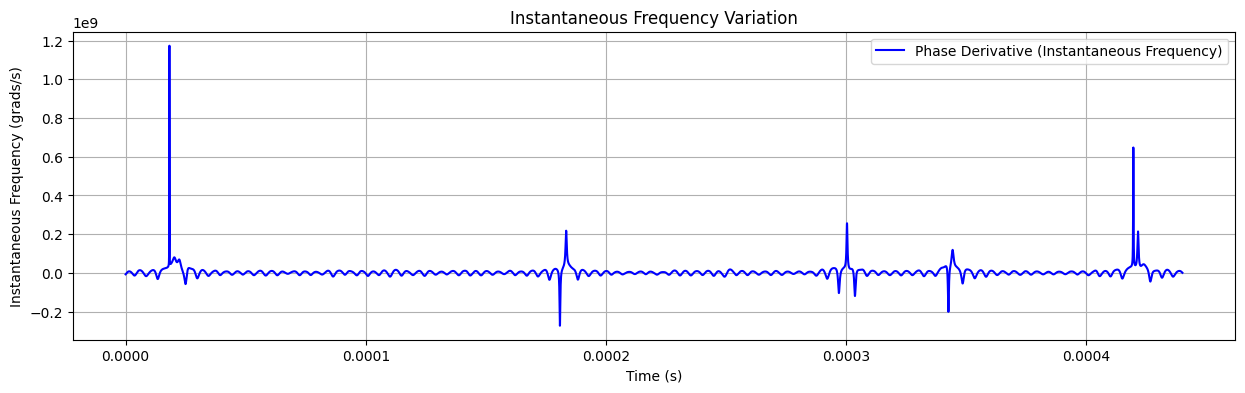

In [78]:
samples = load_samples(data_dir,f"{sufix:03d}")

# Obtain I[0] and Q[1] signals
i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]

# Calculate the magnitude and phase of the IQ signal
mag = np.sqrt(q_signal**2 + i_signal**2)
phase = np.arctan2(q_signal, i_signal)

# Unwrap phase to avoid discontinuities
phase_unwrapped = np.unwrap(phase)

# Apply Savitzky-Golay filter to smooth phase and calculate the instantaneous frequency
phase_diff = savgol_filter(phase_unwrapped, window_length=5, polyorder=2, deriv=1, delta=dt)


# Plot the phase derivative
time_axis = np.arange(len(mag)) / fs  # Time in seconds
plt.figure(figsize=(15, 4))
plt.plot(time_axis, mag, label="Magnitude", color='b')
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")
plt.title("Magnitude")
plt.grid()
plt.legend()
plt.show()

# Generate time axis (one sample less due to differentiation)
time_axis = np.arange(len(phase_diff)) / fs  # Time in seconds
phase_diff_deg = np.rad2deg(phase_diff)  # Convierte de radianes a grados
# Plot the phase derivative
plt.figure(figsize=(15, 4))
plt.plot(time_axis, phase_diff_deg, label="Phase Derivative (Instantaneous Frequency)", color='b')
plt.xlabel("Time (s)")
plt.ylabel("Instantaneous Frequency (grads/s)")
plt.title("Instantaneous Frequency Variation")
plt.grid()
plt.legend()
plt.show()


### Calculate PSD of Magnitude and Instantaneus Frequency Variation

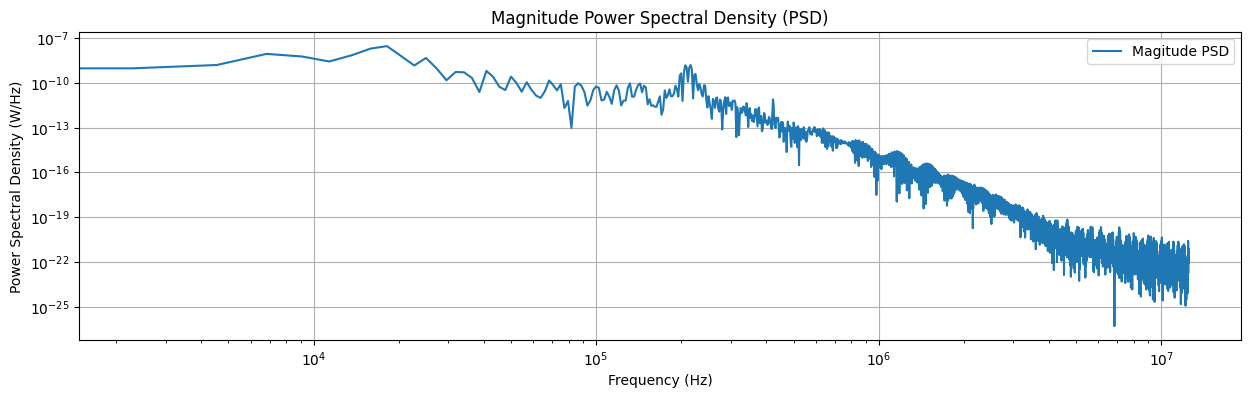

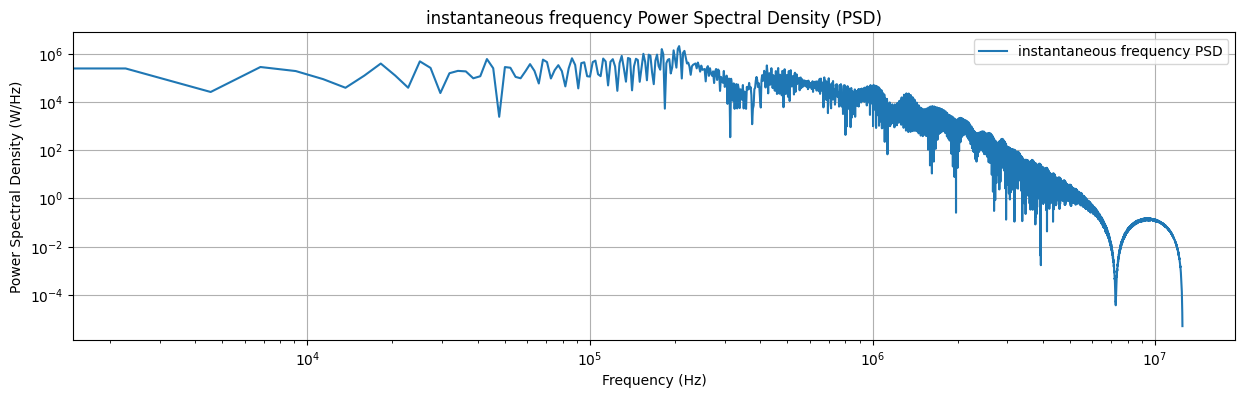

In [8]:

#nperseg=16384
nperseg=11000

# Compute PSD of magnitude using Welch's method

psp_mag, n_psp_mag, frequencies_mag, psd_mag, normalized_psd_mag = power_spectral_density(mag, fs, nperseg=nperseg)

# Compute PSD of phase derivative (instantaneous frequency analysis)
psp_phase, n_psp_phase, frequencies_phase, psd_phase, normalized_psd_phase = power_spectral_density(phase_diff, fs, nperseg=nperseg)

# Graficar la Magnitude PSD 
plt.figure(figsize=(15, 4))
plt.plot(frequencies_mag, psd_mag, label='Magitude PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (W/Hz)')
plt.title('Magnitude Power Spectral Density (PSD)')
plt.grid()
plt.semilogx() 
plt.semilogy() 
plt.legend()
plt.show()

# Graficar la Phase PSD 
plt.figure(figsize=(15, 4))
plt.plot(frequencies_phase, psd_phase, label='instantaneous frequency PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (W/Hz)')
plt.title('instantaneous frequency Power Spectral Density (PSD)')
plt.grid()
plt.semilogx() 
plt.semilogy() 
plt.legend()
plt.show()

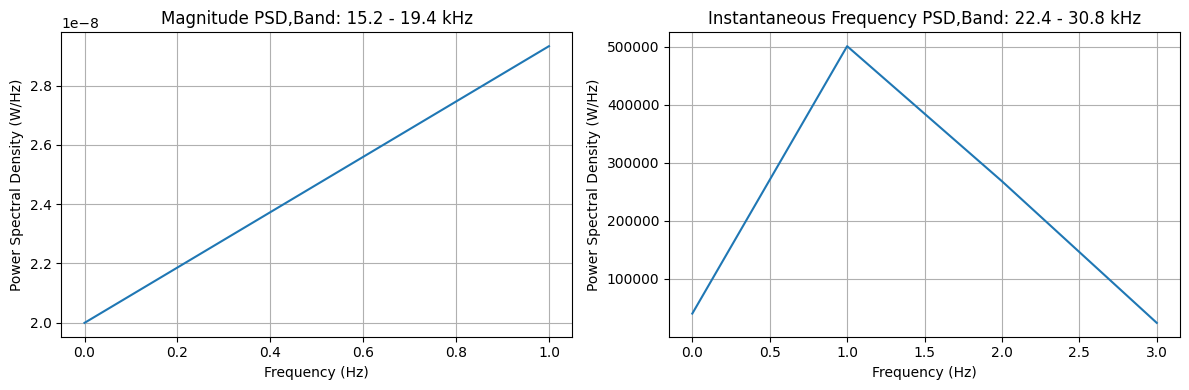

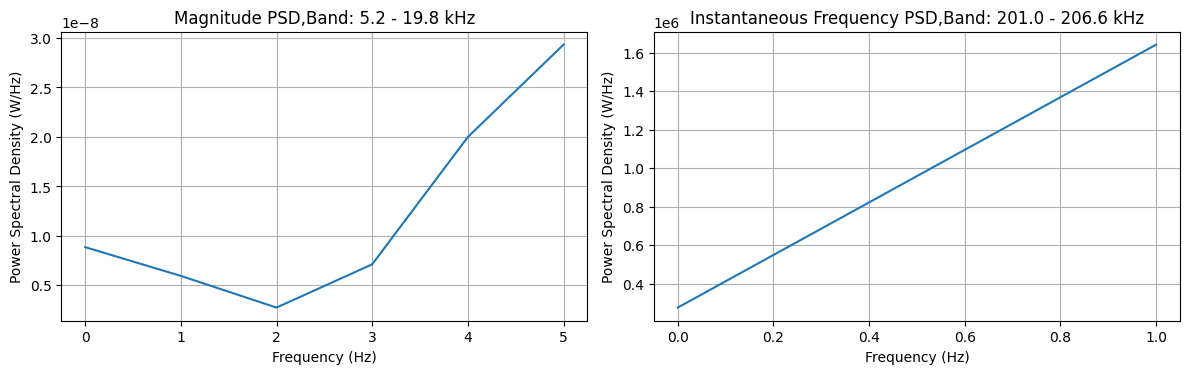

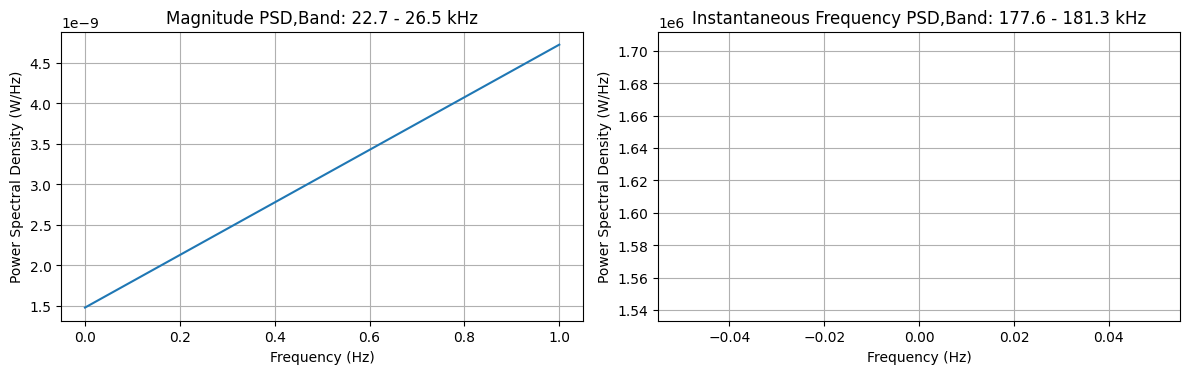

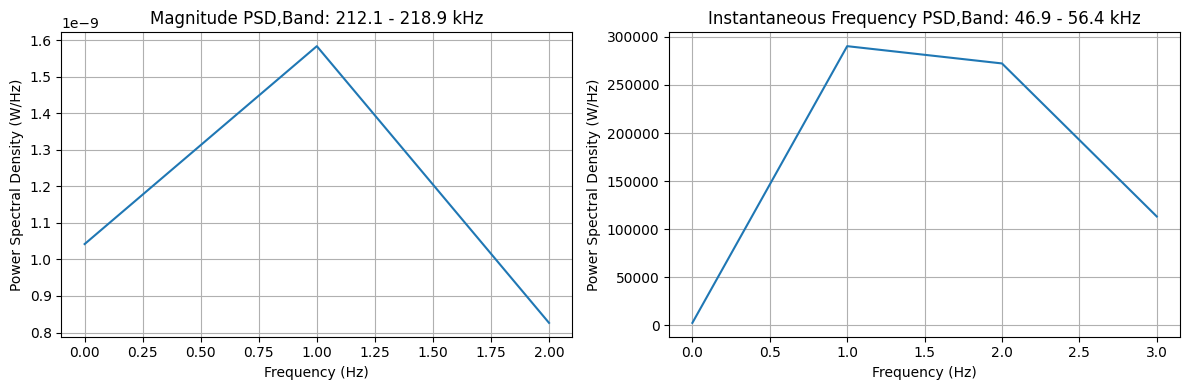

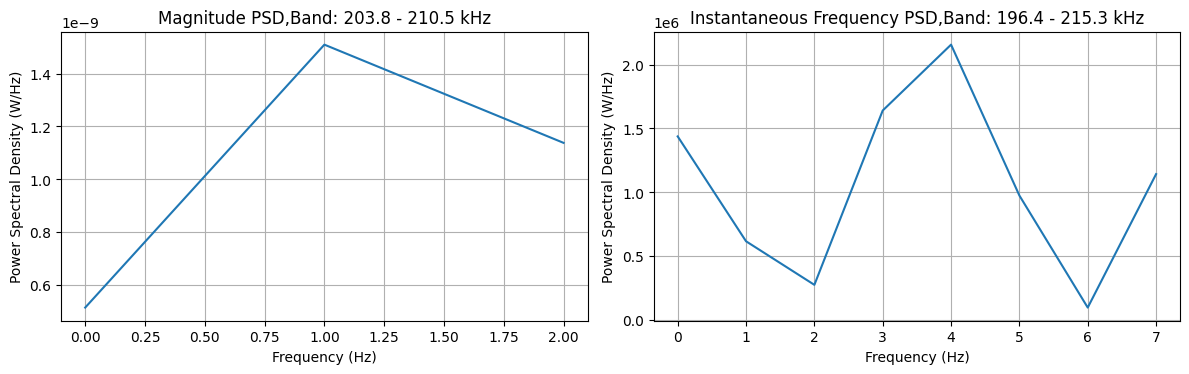

In [10]:
nperseg=11000

# Compute de Magnitude PSD for each band calculated
psd_bands_mag = compute_psd_t(mag, fs, bandwidths_mag, nperseg=nperseg)

# Compute de instantaneous frequency PSD for each band calculated
psd_bands_phase = compute_psd_t(phase_diff, fs, bandwidths_phase, nperseg=nperseg)


# Plot the results for each band side by side
for i, (band_mag, band_phase, psd_mag, psd_phase) in enumerate(zip(bandwidths_mag, bandwidths_phase, psd_bands_mag, psd_bands_phase)):
    # Create a figure with 2 subplots (side by side)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    # Convert frequency limits from Hz to kHz and round to 1 decimal place
    low_khz_mag = band_mag[0] / 1000.0
    high_khz_mag = band_mag[1] / 1000.0
    low_khz_phase = band_phase[0] / 1000.0
    high_khz_phase = band_phase[1] / 1000.0
    
    # Plot Magnitude PSD
    axs[0].plot(psd_mag)
    axs[0].set_title(f'Magnitude PSD,Band: {low_khz_mag:.1f} - {high_khz_mag:.1f} kHz')
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].set_ylabel('Power Spectral Density (W/Hz)')
    #axs[0].semilogx() 
    #axs[0].semilogy() 
    axs[0].grid()
    
    # Plot Instantaneous Frequency PSD
    axs[1].plot(psd_phase)
    axs[1].set_title(f'Instantaneous Frequency PSD,Band: {low_khz_phase:.1f} - {high_khz_phase:.1f} kHz')
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Power Spectral Density (W/Hz)')
    #axs[1].semilogx()
    #axs[1].semilogy() 
    axs[1].grid()
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

In [62]:
# Mostrar los resultados
for i, (low, high) in enumerate(bandwidths_mag):
    print(f"PSD_mag en banda {i+1}: {low:.2f}-{high:.2f} Hz: {psd_bands_mag[i]}")

for i, (low, high) in enumerate(bandwidths_phase):
    print(f"PSD_phase en banda {i+1}: {low:.2f}-{high:.2f} Hz: {psd_bands_phase[i]}")

PSD_mag en banda 1: 15183.17-19399.85 Hz: (array([0.00000000e+00, 2.27272727e+03, 4.54545455e+03, ...,
       1.24954545e+07, 1.24977273e+07, 1.25000000e+07]), array([3.63876481e-18, 3.21011183e-18, 2.81962283e-17, ...,
       7.05691115e-36, 1.35045892e-37, 2.49209249e-37]))
PSD_mag en banda 2: 5226.14-19799.57 Hz: (array([0.00000000e+00, 2.27272727e+03, 4.54545455e+03, ...,
       1.24954545e+07, 1.24977273e+07, 1.25000000e+07]), array([4.38280861e-14, 1.29090035e-13, 7.33582725e-13, ...,
       7.64486434e-35, 1.44709569e-36, 2.71667635e-36]))
PSD_mag en banda 3: 22692.13-26461.81 Hz: (array([0.00000000e+00, 2.27272727e+03, 4.54545455e+03, ...,
       1.24954545e+07, 1.24977273e+07, 1.25000000e+07]), array([1.13253114e-18, 1.15279863e-18, 3.32035223e-18, ...,
       1.65021953e-35, 3.10798455e-37, 5.87369329e-37]))
PSD_mag en banda 4: 212115.80-218911.77 Hz: (array([0.00000000e+00, 2.27272727e+03, 4.54545455e+03, ...,
       1.24954545e+07, 1.24977273e+07, 1.25000000e+07]), array([2

Compute characteristics

In [63]:
# Extract spectral features
features_mag = extract_features_t(psd_bands_mag, bandwidths_mag, freqs_mag, values_mag)
features_phase = extract_features_t(psd_bands_phase, bandwidths_phase, freqs_phase, values_phase)

# Display extracted features
print("Extracted Magnitude Features:")
for i, feature in enumerate(features_mag):
    print(f"Band {i + 1}: {feature}")

# Display extracted features
print("Extracted Instant frequency Features:")
for i, feature in enumerate(features_phase):
    print(f"Band {i + 1}: {feature}")


ValueError: operands could not be broadcast together with shapes (2,5501) (2,) 

In [15]:
# Aplicar la estandarización
standardized_features_mag = standardize_features(features_mag)
standardized_features_phase = standardize_features(features_phase)

# Mostrar los resultados
print("Extracted Magnitude standardize Features:")
for i, feature_dict in enumerate(standardized_features_mag):
    print(f"banda {i+1}: {feature_dict}")

print("Extracted Magnitude standardize Features:")
for i, feature_dict in enumerate(standardized_features_phase):
    print(f"banda {i+1}: {feature_dict}")

Extracted Magnitude standardize Features:
banda 1: {'power': 1.5457435615515451, 'entropy': nan, 'spectral_centroid': nan, 'psd_mean': 5.4776974, 'psd_variance': 1.0296874, 'l_band': -1.3444630446039845, 'h_band': -1.4807847994029903, 'frequency_peak': -1.4463859786402646, 'Magnitude_peak': 4.564957575414118}
banda 2: {'power': 2.580687067985503, 'entropy': nan, 'spectral_centroid': nan, 'psd_mean': 2.5782683, 'psd_variance': 4.992019, 'l_band': -1.448408097480582, 'h_band': -1.4765493018739, 'frequency_peak': -1.566767666417232, 'Magnitude_peak': 2.8708157463542294}
banda 3: {'power': -0.16332503458331196, 'entropy': nan, 'spectral_centroid': nan, 'psd_mean': 0.4107971, 'psd_variance': -0.14203137, 'l_band': -1.266074298984255, 'h_band': -1.4059542944430008, 'frequency_peak': -1.3741569659740842, 'Magnitude_peak': 2.4077471646362505}
banda 4: {'power': -0.22131240229340926, 'entropy': nan, 'spectral_centroid': nan, 'psd_mean': -0.04744881, 'psd_variance': -0.29699966, 'l_band': 0.7113

### create dataset and metadata

In [16]:
features, metadata = create_feature_matrix(standardized_features_mag, standardized_features_phase, sat_label=1, transmitter_label=1, feature_counter=1)

# Print results for verification
print("Feature Matrix Shape:", features.shape)
print("Feature Matrix Name:", metadata["Feature_Matrix_Name"])
print("Metadata:", json.dumps(metadata, indent=2))

Feature Matrix Shape: (80, 9)
Feature Matrix Name: features_1
Metadata: {
  "Satellite_Label": 1,
  "Transmitter_Label": 1,
  "Feature_Matrix_Name": "features_1",
  "Normalized": "False",
  "Colum_Feature_Names": [
    "power",
    "entropy",
    "spectral_centroid",
    "psd_mean",
    "psd_variance",
    "l_band",
    "h_band",
    "frequency_peak",
    "Magnitude_peak"
  ],
  "Rows": [
    "Magnitude_Band_1",
    "Magnitude_Band_2",
    "Magnitude_Band_3",
    "Magnitude_Band_4",
    "Magnitude_Band_5",
    "Magnitude_Band_6",
    "Magnitude_Band_7",
    "Magnitude_Band_8",
    "Magnitude_Band_9",
    "Magnitude_Band_10",
    "Magnitude_Band_11",
    "Magnitude_Band_12",
    "Magnitude_Band_13",
    "Magnitude_Band_14",
    "Magnitude_Band_15",
    "Magnitude_Band_16",
    "Magnitude_Band_17",
    "Magnitude_Band_18",
    "Magnitude_Band_19",
    "Magnitude_Band_20",
    "Magnitude_Band_21",
    "Magnitude_Band_22",
    "Magnitude_Band_23",
    "Magnitude_Band_24",
    "Magnitude_Ba

Save the results

In [ ]:

features_dir = "../../features/" # Define the relative directory path for the features folder
os.makedirs(features_dir, exist_ok=True) # Ensure the features directory exists, create it if it doesn't

# Save the feature matrix and metadata to the features folder
np.save(os.path.join(features_dir, f"{metadata['Feature_Matrix_Name']}.npy"), features)
with open(os.path.join(features_dir, f"{metadata['Feature_Matrix_Name']}_metadata.json"), "w") as f:
    json.dump(metadata, f, indent=2)